# Data Preprocessing: Diabetes Friendly Recipe Dataset

This preprocessing pipeline explores, and visualizes the [`Ashikan/diabetic-friendly-recipes`](https://huggingface.co/datasets/Ashikan/diabetic-friendly-recipes) dataset. It ensures the data is in a structured format suitable for embedding generation.

## Key Steps

### 1. Dataset Loading
- Utilizes the `datasets` library to fetch the dataset.
- Converts the training split into a pandas DataFrame.

### 2. Initial Inspection
- Displays column info and data types.
- Checks for null values (absolute and percentage).
- Previews the first few rows .

### 3. Data Visualization
- Numeric columns: Histogram distributions using `seaborn.histplot`.
- Ingredient: Bar charts of the top 20 most popular recipes with a certain ingredient.

### 4. Data Output
- Cleaned dataset saved as: `processed_data/cleaned_recipes_1.csv`


## 📁 Output Directory
- `visualizations/`: Contains all distribution plots.

### Imports , Loading Dataset

In [2]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import os

In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [14]:
# Create output directory for visualizations and processed data

os.makedirs('visualizations', exist_ok=True)
os.makedirs('processed_data', exist_ok=True)

In [15]:
# Load dataset

dataset = load_dataset("Ashikan/diabetic-friendly-recipes")
df = dataset['train'].to_pandas()
print("Dataset Loaded")

Dataset Loaded


### Summary Statistics

In [16]:
# Display dataset info and check for null values

print("\nDataset Info:")
print(df.info())
print("\nNull values in each column:")
print(df.isnull().sum())
print("\nPercentage of null values in each column:")
print((df.isnull().sum() / len(df) * 100).round(2))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   recipeName   718 non-null    object
 1   serves       718 non-null    object
 2   ingredients  718 non-null    object
 3   steps        718 non-null    object
 4   NER          718 non-null    object
dtypes: object(5)
memory usage: 28.2+ KB
None

Null values in each column:
recipeName     0
serves         0
ingredients    0
steps          0
NER            0
dtype: int64

Percentage of null values in each column:
recipeName     0.0
serves         0.0
ingredients    0.0
steps          0.0
NER            0.0
dtype: float64


In [17]:
print(df.head())

                      recipeName serves  \
0   one pot creamy chicken pasta      4   
1      lemon blueberry poke cake      6   
2  tomato and red pepper risotto      4   
3              breakfast cookies     12   
4      spiced pear strudel bites      5   

                                         ingredients  \
0  [500 g free-range chicken breast fillets, halv...   
1  [¼ cup brown sugar, divided, ½ cup coconut oil...   
2  [1 tablespoon rapeseed oil, 1 small onion, fin...   
3  [200g rolled oats, 150g whole wheat flour, 2 t...   
4  [3 (approx 460g total)  pears, peeled and fine...   

                                               steps  \
0  [place the chicken, garlic, butter, leek, thym...   
1  [preheat oven to 180°c. coat a loaf pan with c...   
2  [heat the oil in a non-stick pan. add the onio...   
3  [preheat the oven to 160°c. line a large bakin...   
4  [preheat the oven to 160ºc. line 2 baking tray...   

                                                 NER  
0  [chicken 

### cleaning not required 
data is already prepared 

### Visualisation

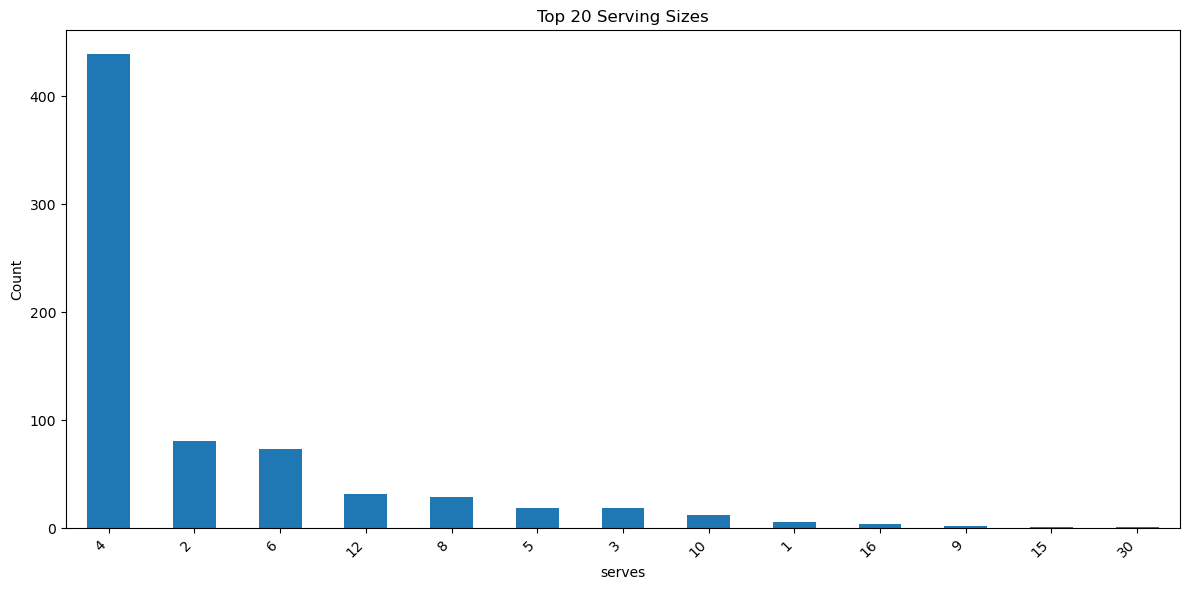

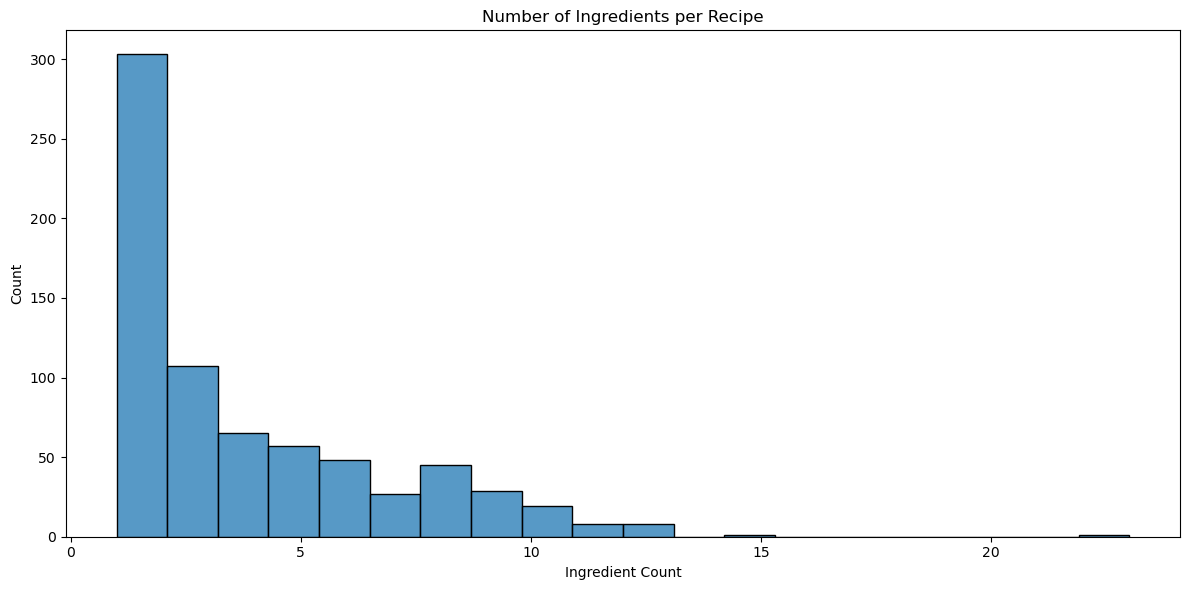

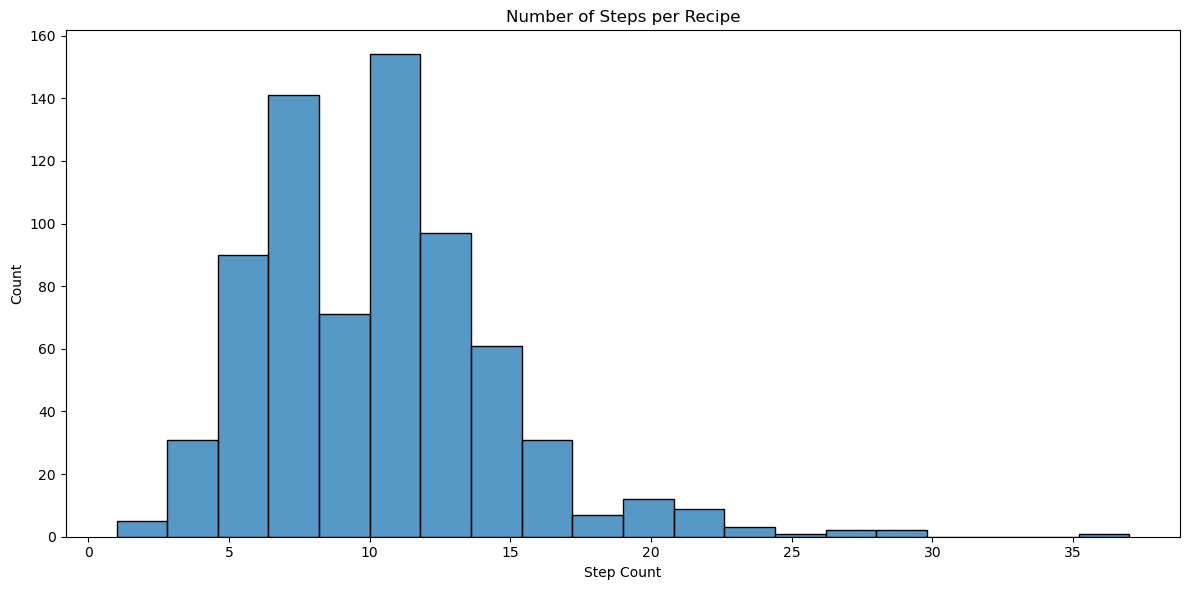

In [21]:
# serves: Clean and count serving sizes
plt.figure(figsize=(12, 6))
df['serves'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Serving Sizes')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('visualizations/serves_distribution.png', dpi=300)
plt.show()
plt.close()

# ingredients: Plot number of ingredients per recipe
plt.figure(figsize=(12, 6))
df['ingredients_count'] = df['ingredients'].apply(lambda x: len(str(x).split(',')))
sns.histplot(df['ingredients_count'], bins=20)
plt.title('Number of Ingredients per Recipe')
plt.xlabel('Ingredient Count')
plt.tight_layout()
plt.savefig('visualizations/ingredients_distribution.png', dpi=300)
plt.show()
plt.close()

# steps: Plot number of steps per recipe
plt.figure(figsize=(12, 6))
df['steps_count'] = df['steps'].apply(lambda x: len(str(x).split('.')))
sns.histplot(df['steps_count'], bins=20)
plt.title('Number of Steps per Recipe')
plt.xlabel('Step Count')
plt.tight_layout()
plt.savefig('visualizations/steps_distribution.png', dpi=300)
plt.show()
plt.close()

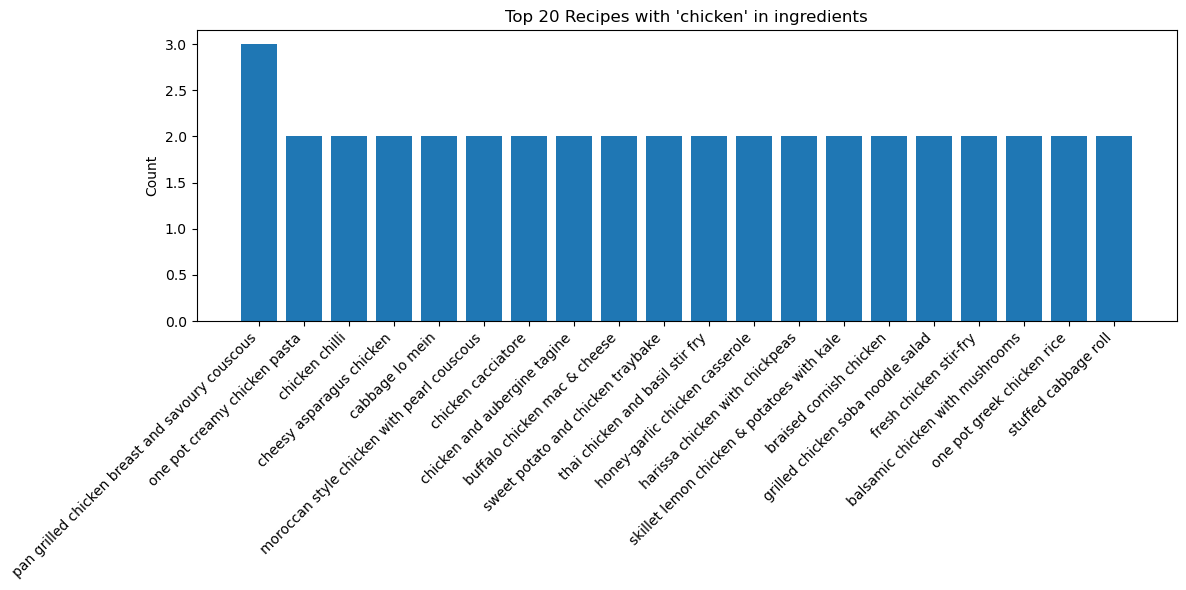

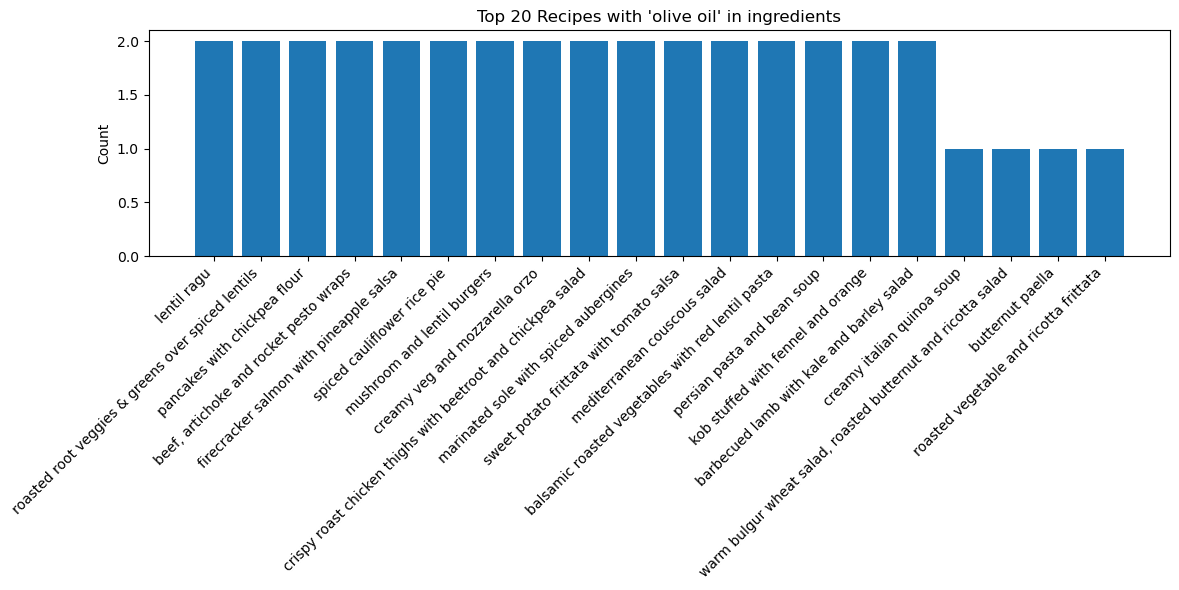

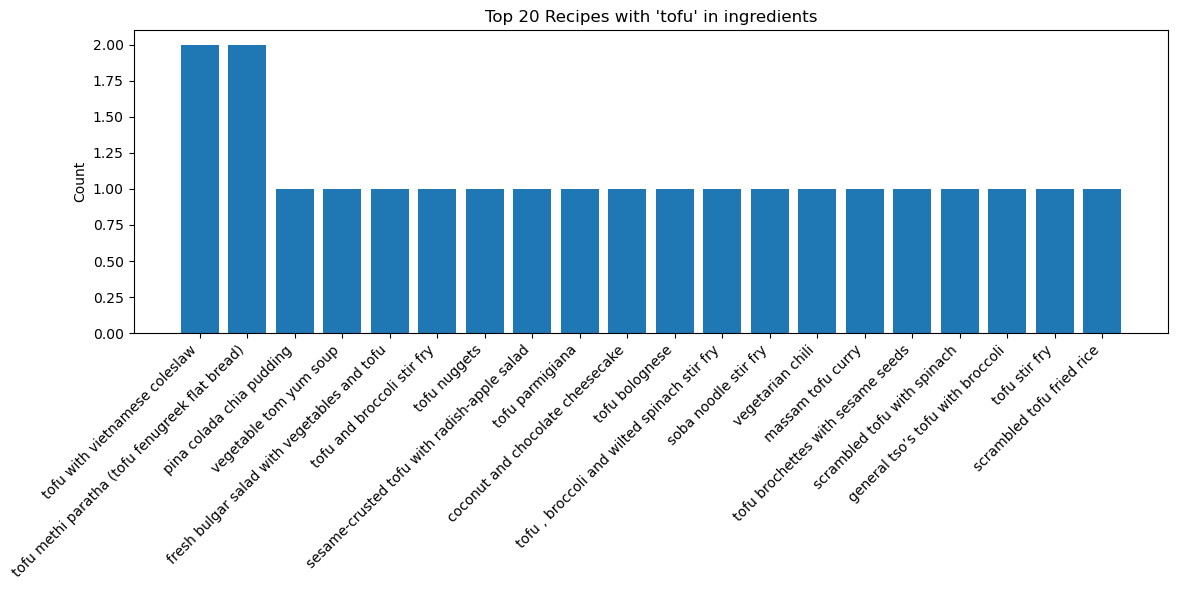

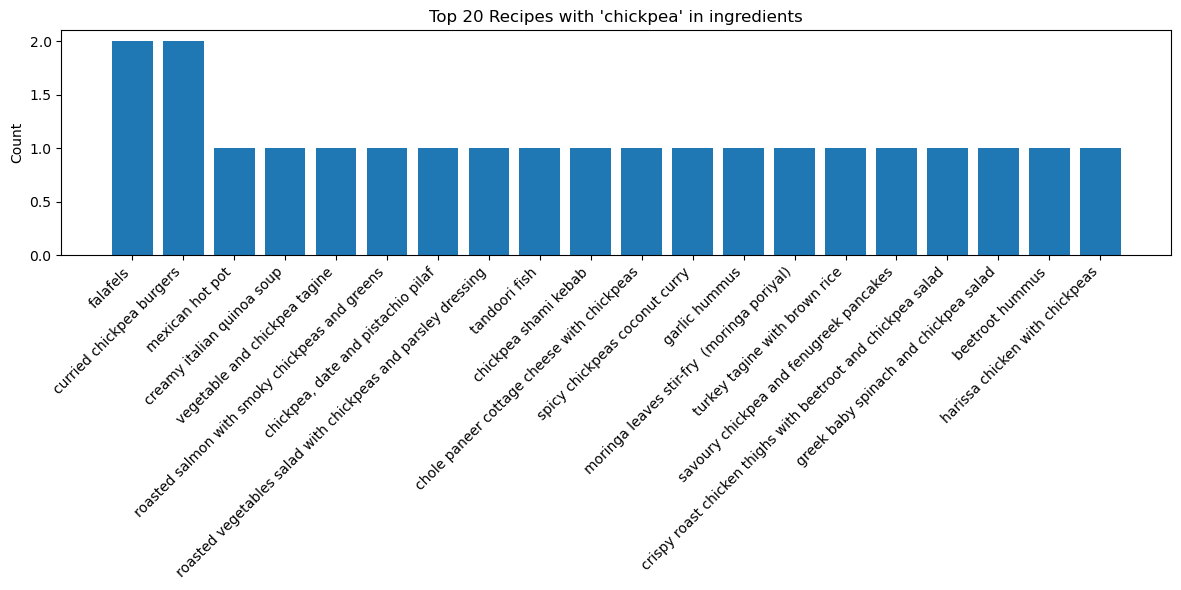

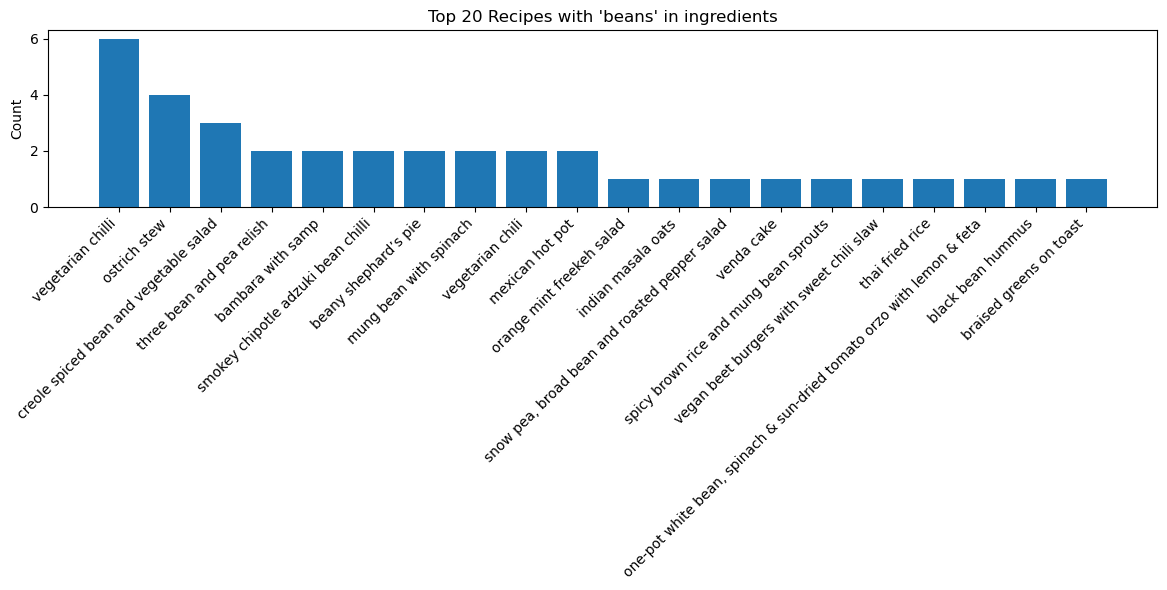

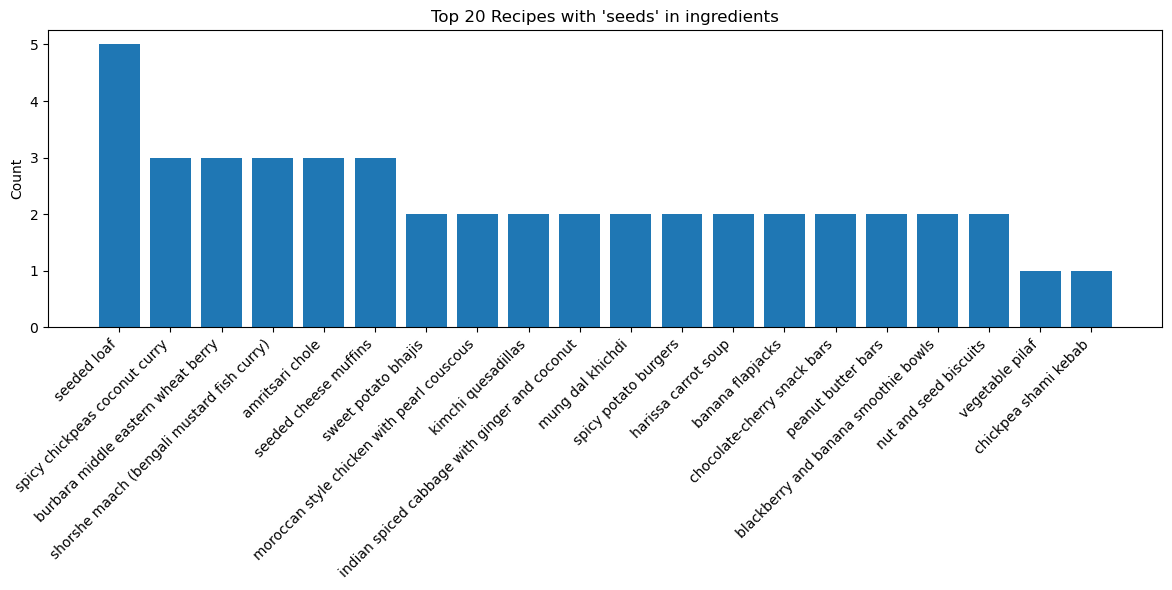

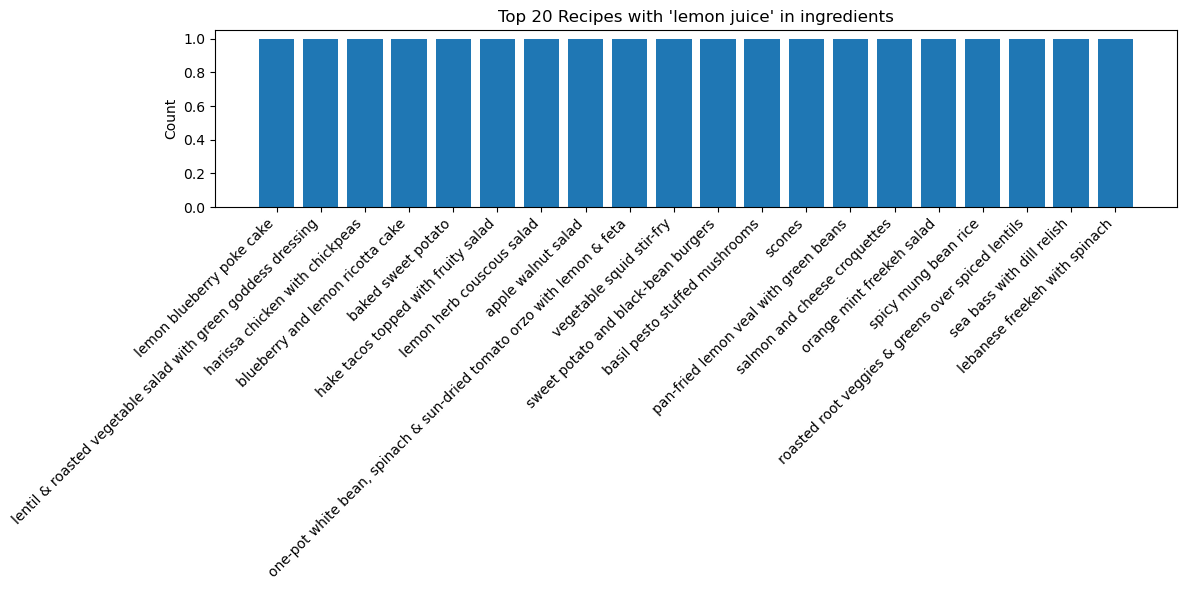

In [20]:
# Column and words to search
column_to_search = 'ingredients'
words = ['chicken','olive oil','tofu','chickpea','beans','seeds','lemon juice']

for word in words:
    df[f'{word}_count'] = df[column_to_search].astype(str).str.lower().str.count(word)

    top_recipes_with_word = df[df[f'{word}_count'] > 0].sort_values(
        by=f'{word}_count', ascending=False).head(20)

    if not top_recipes_with_word.empty:
        plt.figure(figsize=(12, 6))
        plt.bar(top_recipes_with_word['recipeName'], top_recipes_with_word[f'{word}_count'])
        plt.title(f"Top 20 Recipes with '{word}' in {column_to_search}")
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.savefig(f'visualizations/{word}_mentions_in_{column_to_search}.png', dpi=300)
        plt.show()
        plt.close()